In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/complete_renewable_energy_dataset.csv')

In [54]:
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [4]:
df.shape

(2500, 56)

In [5]:
df.isnull().sum()

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

In [6]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Country                                     object
Year                                         int64
Energy Type                                 object
Production (GWh)                           float64
Installed Capacity (MW)                    float64
Investments (USD)                          float64
Population                                   int64
GDP                                        float64
Energy Consumption                         float64
Energy Exports                             float64
Energy Imports                             float64
CO2 Emissions                              float64
Renewable Energy Jobs                        int64
Government Policies                          int64
R&D Expenditure                            float64
Renewable Energy Targets                     int64
Average Annual Temperature                 float64
Annual Rainfall                            float64
Solar Irradiance                           float64
Wind Speed                     

In [10]:
df.columns

Index(['Country', 'Year', 'Energy Type', 'Production (GWh)',
       'Installed Capacity (MW)', 'Investments (USD)', 'Population', 'GDP',
       'Energy Consumption', 'Energy Exports', 'Energy Imports',
       'CO2 Emissions', 'Renewable Energy Jobs', 'Government Policies',
       'R&D Expenditure', 'Renewable Energy Targets',
       'Average Annual Temperature', 'Annual Rainfall', 'Solar Irradiance',
       'Wind Speed', 'Hydro Potential', 'Geothermal Potential',
       'Biomass Availability', 'Energy Storage Capacity',
       'Grid Integration Capability', 'Electricity Prices', 'Energy Subsidies',
       'International Aid for Renewables', 'Public Awareness',
       'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization',
       'Renewable Energy Patents', 'Educational Level',
       'Technology Transfer Agreements', 'Renewable Energy Education Programs',
       'Local Manufacturing Capacity', 'Import Tariffs on Energy Equipme

In [14]:
# Average production by Country
avg_prodction_country=df.groupby('Country')['Production (GWh)'].mean().sort_values(ascending=False)
avg_prodction_country

Country
China        50181.722089
India        49553.173445
Japan        49393.982693
Germany      49376.907146
France       49260.129974
Brazil       48882.105709
Canada       48143.321948
Russia       48041.818858
Australia    47762.959181
USA          46496.850105
Name: Production (GWh), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

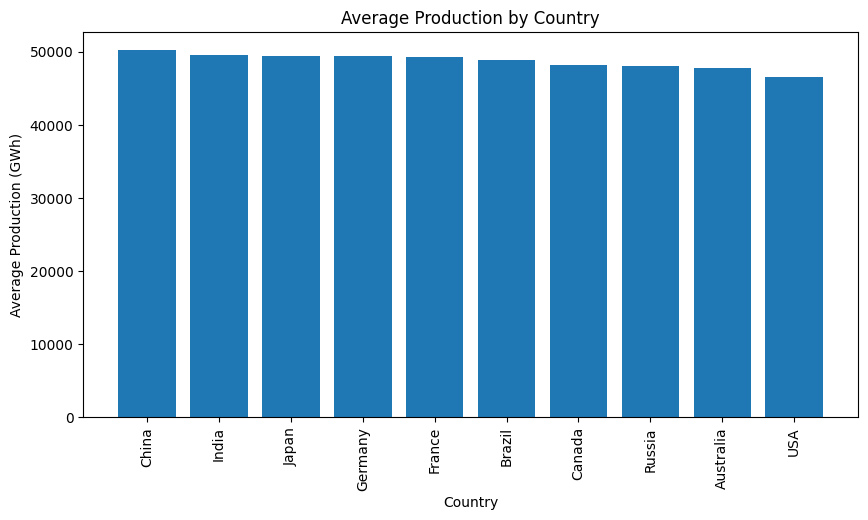

In [15]:
# visualization average producation by country
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(avg_prodction_country.index,avg_prodction_country.values)
plt.xlabel('Country')
plt.ylabel('Average Production (GWh)')
plt.title('Average Production by Country')
plt.xticks(rotation=90)
plt.show

In [19]:
df['Energy Type'].unique()

array(['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro'], dtype=object)

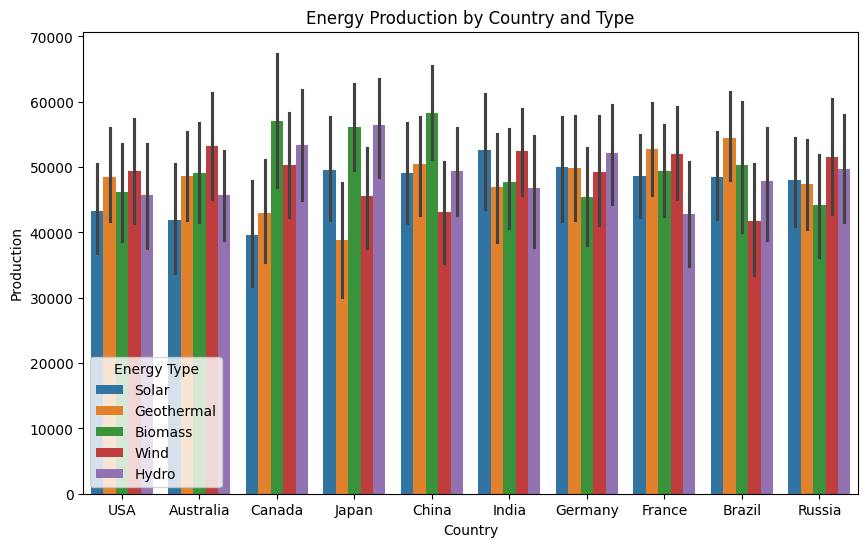

In [20]:
# visualization Production by country and Energy Type.
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Production (GWh)', hue='Energy Type', data=df)
plt.title('Energy Production by Country and Type')
plt.xlabel('Country')
plt.ylabel('Production')
plt.legend(title='Energy Type')
plt.show()

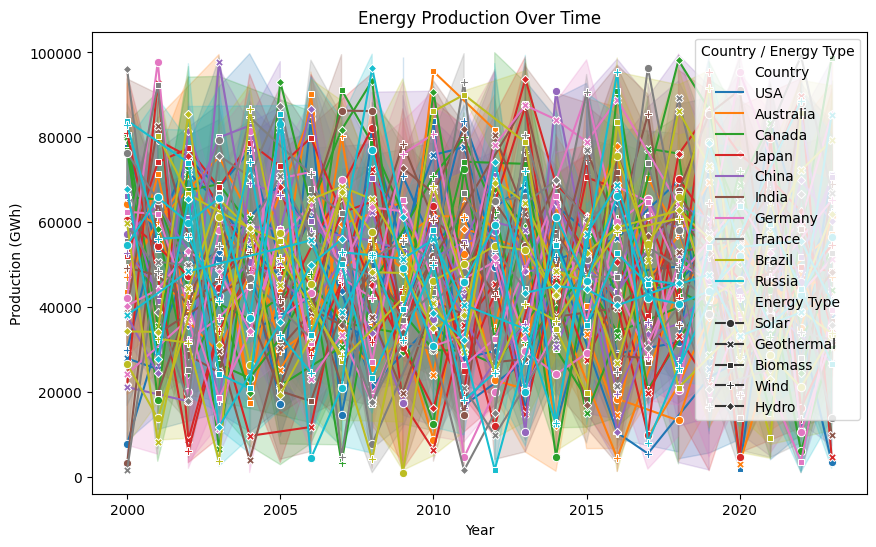

In [22]:
# Visaualization Energy production over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Production (GWh)', hue='Country', style='Energy Type', data=df, markers=True, dashes=False)
plt.title('Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (GWh)')
plt.legend(title='Country / Energy Type')
plt.show()

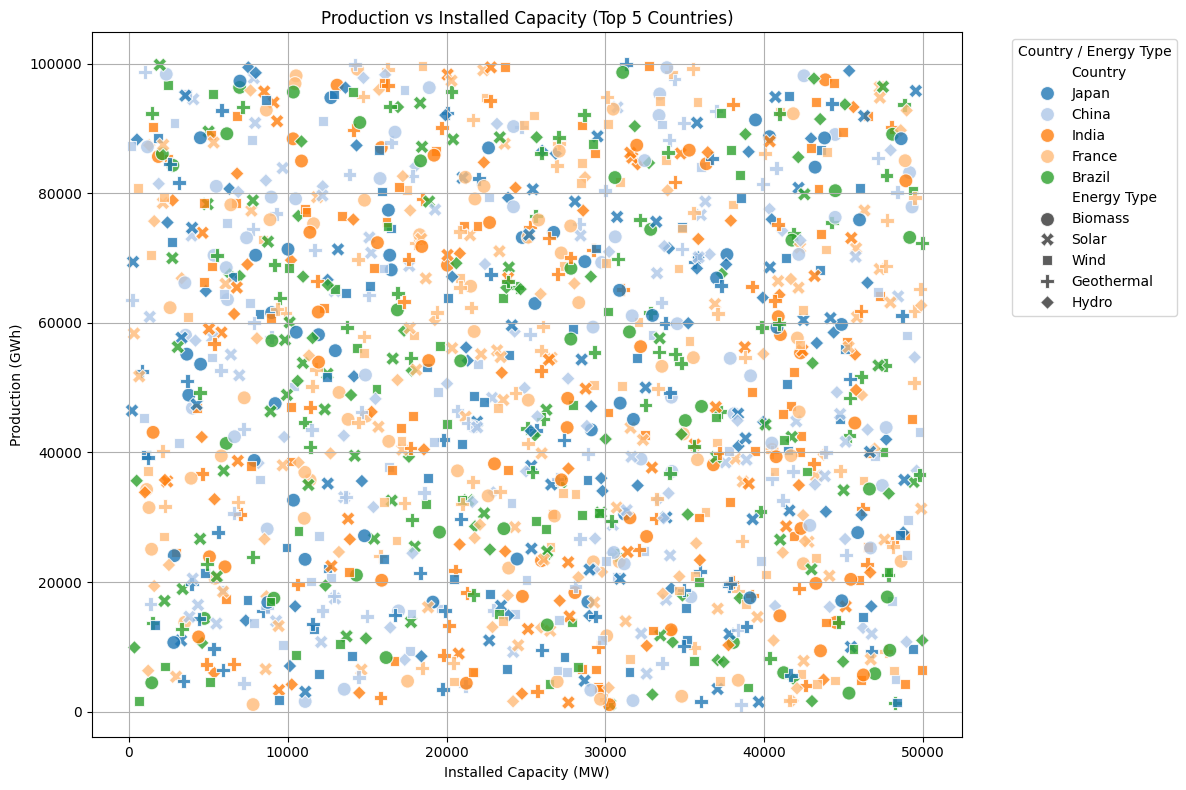

In [40]:
# Visualization Production vs Installed Capacity
import seaborn as sns
# Calculate total production for each country
total_production = df.groupby('Country')['Production (GWh)'].sum().reset_index()

# Select top 5 countries based on total production
top_5_countries = total_production.nlargest(5, 'Production (GWh)')['Country']

# Filter the dataframe to include only the top 5 countries
top_5_df = df[df['Country'].isin(top_5_countries)]

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Installed Capacity (MW)',
    y='Production (GWh)',
    hue='Country',
    style='Energy Type',
    s=100,  # Adjust marker size for better visibility
    alpha=0.8,  # Adjust transparency for better readability
    palette='tab20',  # Use a diverse color palette
    data=top_5_df
)

plt.title('Production vs Installed Capacity (Top 5 Countries)')
plt.xlabel('Installed Capacity (MW)')
plt.ylabel('Production (GWh)')
plt.legend(title='Country / Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

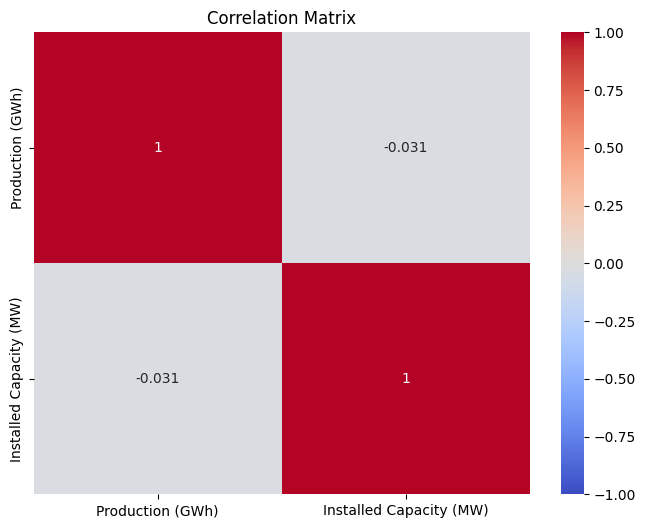

In [29]:
# Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Production (GWh)', 'Installed Capacity (MW)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


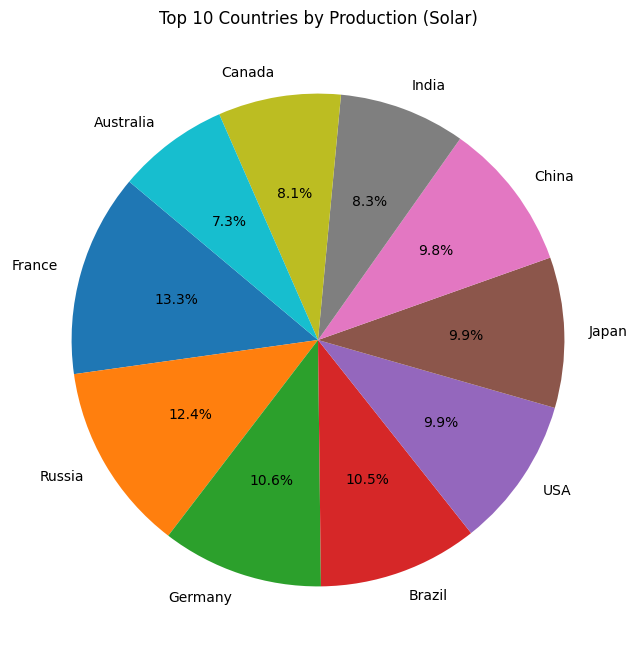

In [32]:
# visualize the data that eneragy type is solar with respect to highest 10 countries
# Filter data for the specific energy type
energy_type = 'Solar'
subset = df[df['Energy Type'] == energy_type]

# Aggregate production by country
country_production = subset.groupby('Country')['Production (GWh)'].sum().reset_index()

# Get the top 10 countries by production
top_10_countries = country_production.nlargest(10, 'Production (GWh)')

# Pie Chart for the top 10 countries
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries['Production (GWh)'], labels=top_10_countries['Country'], autopct='%1.1f%%', startangle=140)
plt.title(f'Top 10 Countries by Production ({energy_type})')
plt.show()

In [42]:
# BUliding predictive model

from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df

# One-hot encoding for 'Energy_Type'
df_encoded = pd.get_dummies(df, columns=['Energy Type'])

# Feature selection
features = df_encoded[['Installed Capacity (MW)', 'Year'] + [col for col in df_encoded.columns if 'Energy Type' in col]]
target = df_encoded['Production (GWh)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the encoded DataFrame
print(df_encoded.head())

     Country  Year  Production (GWh)  Installed Capacity (MW)  \
0        USA  2011      85404.690027              5549.794323   
1  Australia  2008      22205.069382             43211.593798   
2     Canada  2013      94102.732038              6139.117212   
3      Japan  2010      88771.932910             40323.639260   
4      China  2018      93288.408581             30755.403056   

   Investments (USD)  Population           GDP  Energy Consumption  \
0       5.604125e+09  1064007213  1.775278e+14       369654.644184   
1       6.361886e+08  1033255852  6.435372e+13       771781.636293   
2       6.158680e+09    14895124  1.567926e+14       342707.152899   
3       8.526116e+09  1448827283  1.350464e+14       498839.574253   
4       5.086237e+09  1499494307  8.677956e+13       819064.362785   

   Energy Exports  Energy Imports  ...  \
0    93087.198199    13413.184740  ...   
1     1752.536054    78493.982208  ...   
2    65146.592498    41114.872188  ...   
3    50257.591014   

In [48]:
from sklearn.preprocessing import StandardScaler
# One-hot encoding for 'Energy_Type'
df_encoded = pd.get_dummies(df, columns=['Energy Type'])

# Feature selection
features = df_encoded[['Installed Capacity (MW)', 'Year'] + [col for col in df_encoded.columns if 'Energy Type' in col]]
target = df_encoded['Production (GWh)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression - MAE: 24763.17500979212, MSE: 817627309.1943839


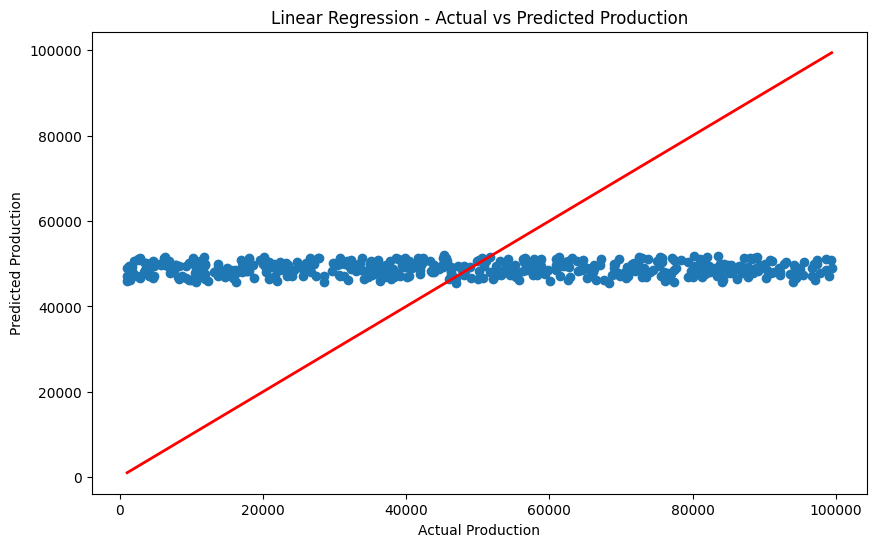

In [49]:
# Initialize the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Linear Regression - Actual vs Predicted Production')
plt.show()


Random Forest - MAE: 25687.669129930237, MSE: 911265397.6615261


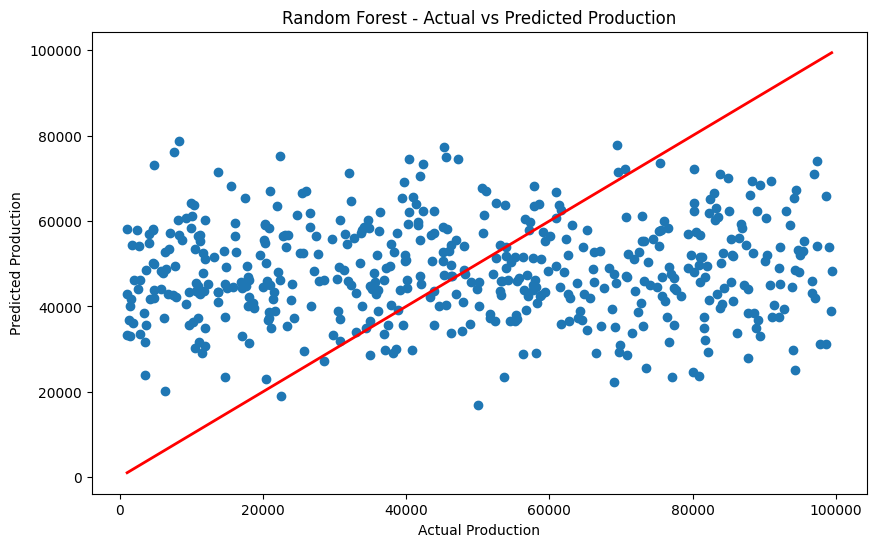

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest - MAE: {mae_rf}, MSE: {mse_rf}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest - Actual vs Predicted Production')
plt.show()


Gradient Boosting - MAE: 24857.480412979057, MSE: 824627752.2867253


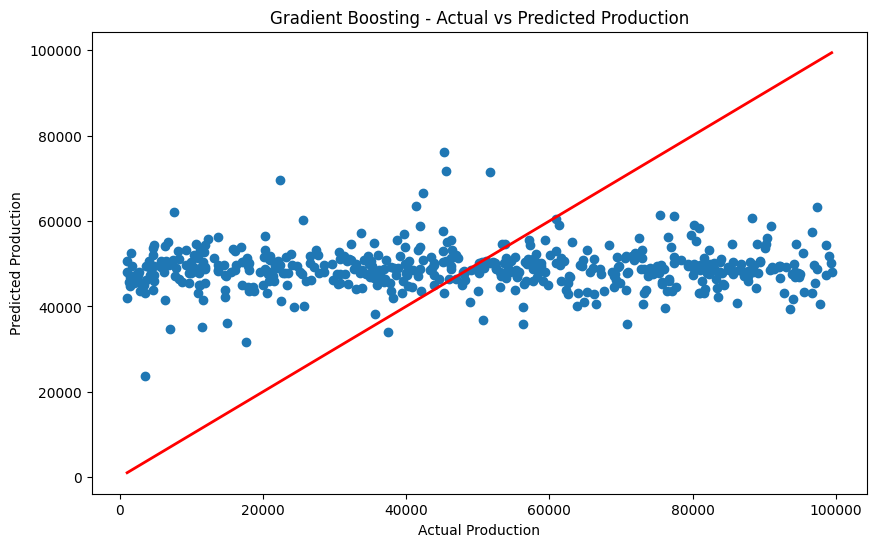

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Gradient Boosting - Actual vs Predicted Production')
plt.show()


XGBoost - MAE: 26493.5778620426, MSE: 1039847803.9988089


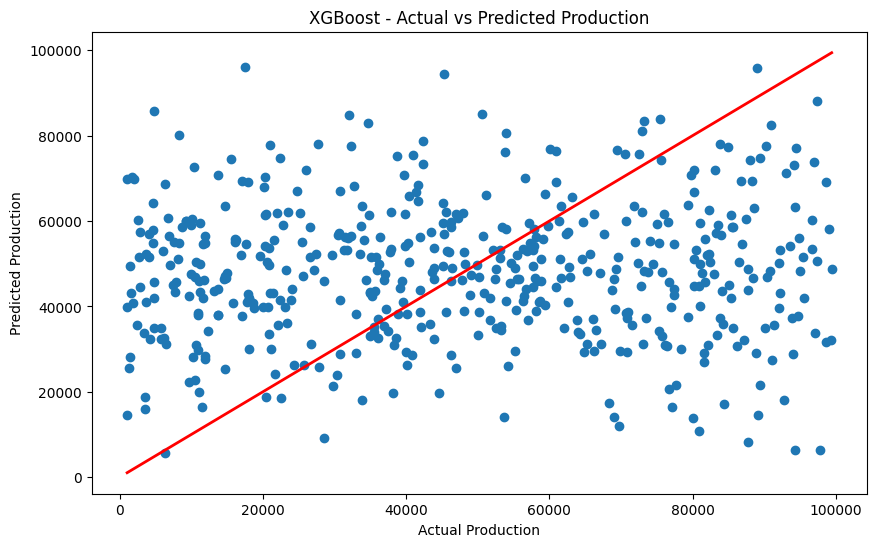

In [52]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost - MAE: {mae_xgb}, MSE: {mse_xgb}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('XGBoost - Actual vs Predicted Production')
plt.show()
